In [1]:
!pip install yfinance prophet

In [3]:
import yfinance as yf
import pandas as pd

data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
data.to_csv('stock_data.csv')
data.head()

/tmp/ipython-input-3-3299301064.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288574,24.757328,23.848700,24.746220,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606560,23.866485,23.244440,23.668764,263188400
2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
2015-01-08,24.857311,24.915073,24.148625,24.266371,237458000


/tmp/ipython-input-6-1649293624.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Missing Values:
 Price  Ticker
Date             0
Close  AAPL      0
dtype: int64
Price        Date      Close
Ticker                  AAPL
0      2015-01-02  24.288574
1      2015-01-05  23.604330
2      2015-01-06  23.606560
3      2015-01-07  23.937574
4      2015-01-08  24.857311


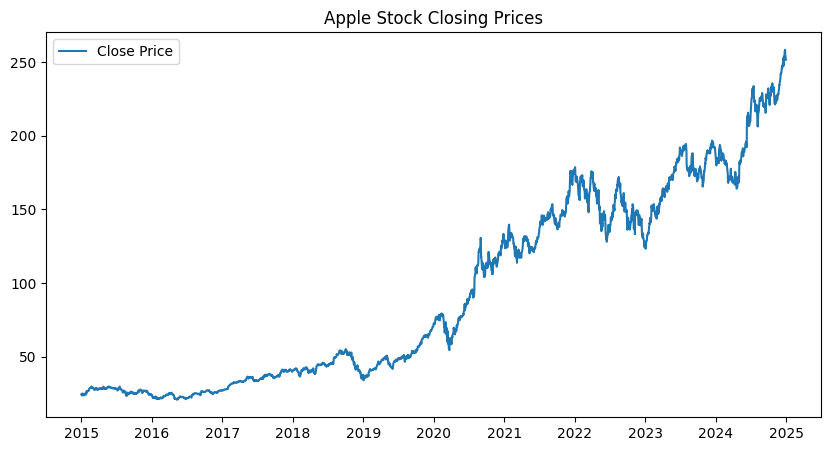

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ✅ Download Data
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')

# ✅ Reset index
data.reset_index(inplace=True)

# ✅ Keep only Date and Close
data = data[['Date', 'Close']]

# ✅ Check for Missing Values
print("Missing Values:\n", data.isnull().sum())

# ✅ Drop Missing (if any)
data.dropna(inplace=True)

# ✅ Sort Data by Date (just in case)
data.sort_values('Date', inplace=True)

# ✅ Final Clean Data
print(data.head())

# ✅ Plot Closing Price
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label="Close Price")
plt.title("Apple Stock Closing Prices")
plt.legend()
plt.show()


#ARIMA Forecasting

In [7]:
!pip install statsmodels

/tmp/ipython-input-8-3999813883.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


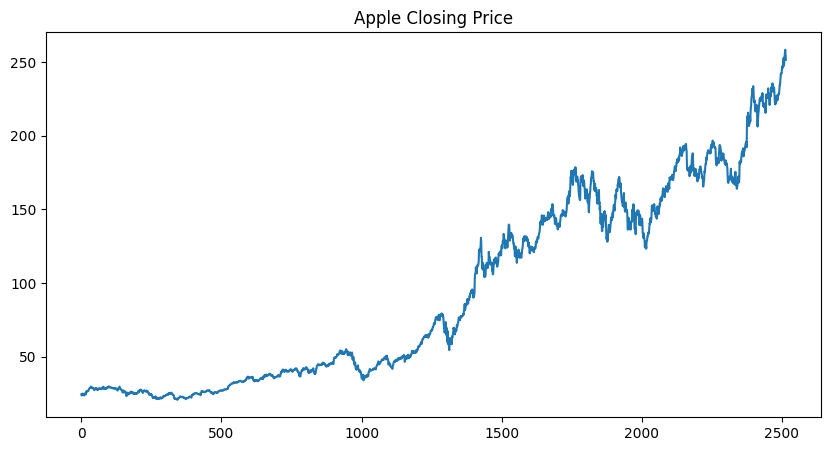

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2515
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5213.733
Date:                Tue, 22 Jul 2025   AIC                          10439.466
Time:                        12:31:19   BIC                          10474.444
Sample:                             0   HQIC                         10452.161
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0125      0.013     -0.981      0.327      -0.038       0.012
ar.L2         -0.0254      0.014     -1.849      0.064      -0.052       0.002
ar.L3         -0.0239      0.014     -1.653      0.0

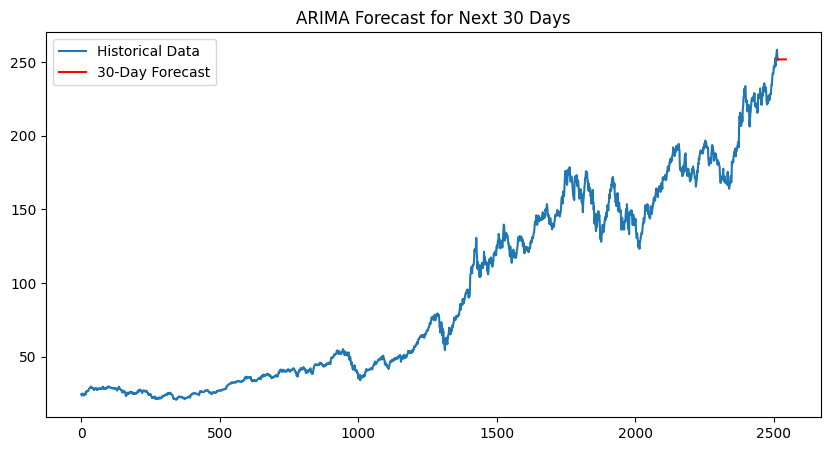

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# ✅ Load Cleaned Data (or re-download if in new session)
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.reset_index(inplace=True)
data = data[['Date', 'Close']]
data.dropna(inplace=True)

# ✅ ARIMA Model
closing_prices = data['Close']

# Plot original data
plt.figure(figsize=(10,5))
plt.plot(closing_prices)
plt.title('Apple Closing Price')
plt.show()

# ✅ Fit ARIMA Model
model = ARIMA(closing_prices, order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# ✅ Summary
print(model_fit.summary())

# ✅ Forecast Next 30 Days
forecast = model_fit.forecast(steps=30)

# ✅ Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(closing_prices, label='Historical Data')
plt.plot(range(len(closing_prices), len(closing_prices)+30), forecast, label='30-Day Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast for Next 30 Days')
plt.show()


PROPHET MODEL

In [9]:
!pip install prophet

In [10]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf

# ✅ Download data (skip if already done)
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.reset_index(inplace=True)
data = data[['Date', 'Close']].dropna()

# ✅ Prophet needs 'ds' and 'y' columns
df = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# ✅ Initialize and Fit Prophet Model
model = Prophet(daily_seasonality=True)
model.fit(df)

# ✅ Forecast Next 30 Days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# ✅ Plot Forecast
fig = model.plot(forecast)
plt.title('Apple Stock Forecast (Prophet)')
plt.show()

# ✅ Components Plot (Trend + Seasonality)
fig2 = model.plot_components(forecast)
plt.show()


/tmp/ipython-input-10-2114926872.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


TypeError: arg must be a list, tuple, 1-d array, or Series

In [11]:
from prophet import Prophet

# Initialize and fit Prophet
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df)

# Make future DataFrame and predict
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)

# Plot Prophet Forecast
model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast - Apple Stock')
plt.show()

# Plot seasonality, trend components
model_prophet.plot_components(forecast_prophet)
plt.show()


TypeError: arg must be a list, tuple, 1-d array, or Series

/tmp/ipython-input-12-1742750764.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


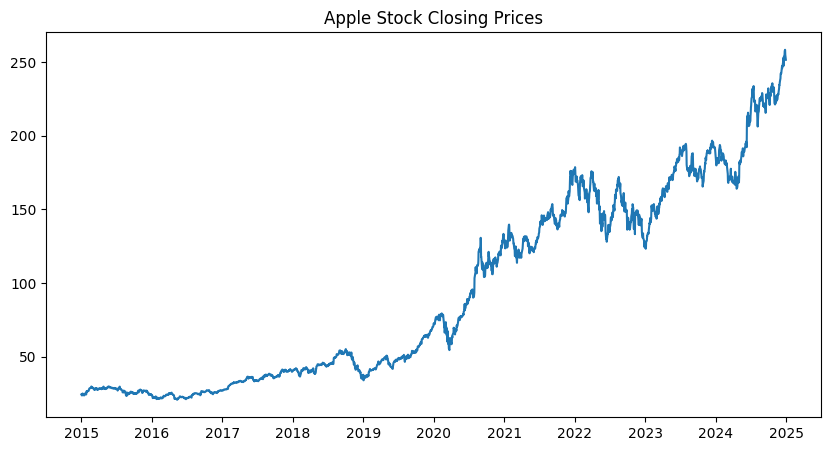

In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download Apple stock data
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')

# Reset index and select required columns
data.reset_index(inplace=True)
df = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Drop missing values
df.dropna(inplace=True)

# Plot raw data
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'])
plt.title('Apple Stock Closing Prices')
plt.show()


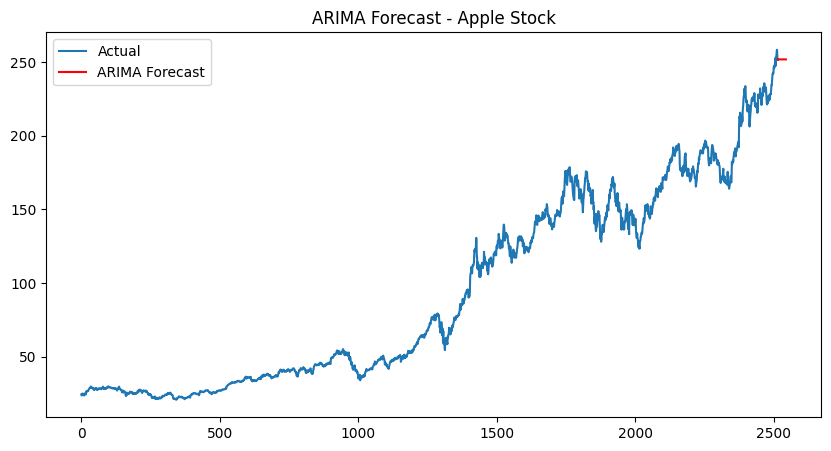

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA expects series, not dataframe
close_series = df['y']

# Fit ARIMA Model
model_arima = ARIMA(close_series, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Plot ARIMA Forecast
plt.figure(figsize=(10,5))
plt.plot(close_series, label='Actual')
plt.plot(range(len(close_series), len(close_series)+30), forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast - Apple Stock')
plt.show()


/tmp/ipython-input-35-2248708130.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


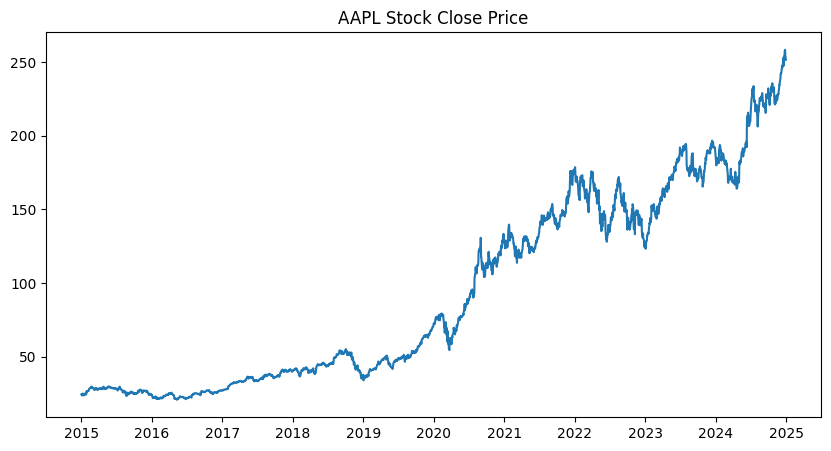

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


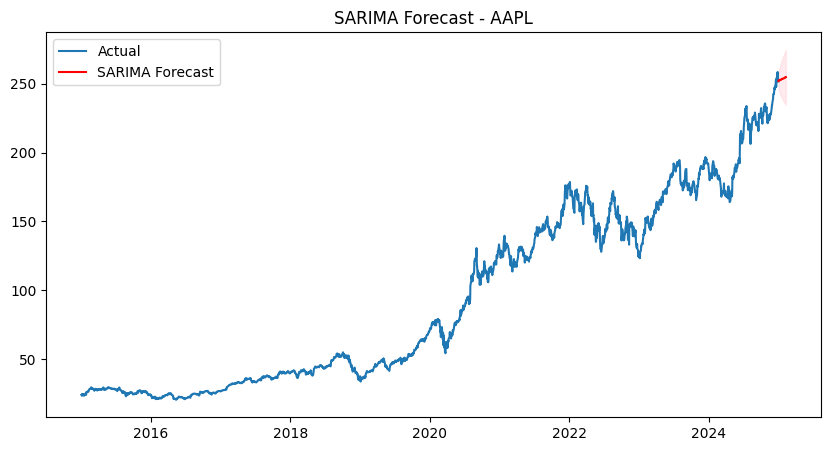

In [35]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ✅ Data Collection
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.reset_index(inplace=True)
df = data[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# ✅ Plot to Visualize
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("AAPL Stock Close Price")
plt.show()

# ✅ SARIMA Model - Example (p,d,q)(P,D,Q,s):
model_sarima = SARIMAX(df['Close'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),  # 12 = monthly seasonality
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results_sarima = model_sarima.fit()

# ✅ Forecasting Next 30 Days
forecast_sarima = results_sarima.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='B')
forecast_series = forecast_sarima.predicted_mean
conf_int = forecast_sarima.conf_int()

# ✅ Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_index, forecast_series, label='SARIMA Forecast', color='red')
plt.fill_between(forecast_index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast - AAPL')
plt.show()


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nwf1ght/qfcpxz72.json


Data Types after renaming and cleaning:
ds    datetime64[ns]
y            float64
dtype: object

Sample Data after renaming and cleaning:
          ds          y
0 2015-01-02  27.332500
1 2015-01-05  26.562500
2 2015-01-06  26.565001
3 2015-01-07  26.937500
4 2015-01-08  27.972500


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0nwf1ght/hpp0ecsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13632', 'data', 'file=/tmp/tmp0nwf1ght/qfcpxz72.json', 'init=/tmp/tmp0nwf1ght/hpp0ecsc.json', 'output', 'file=/tmp/tmp0nwf1ght/prophet_modeloqrdfku1/prophet_model-20250722125356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


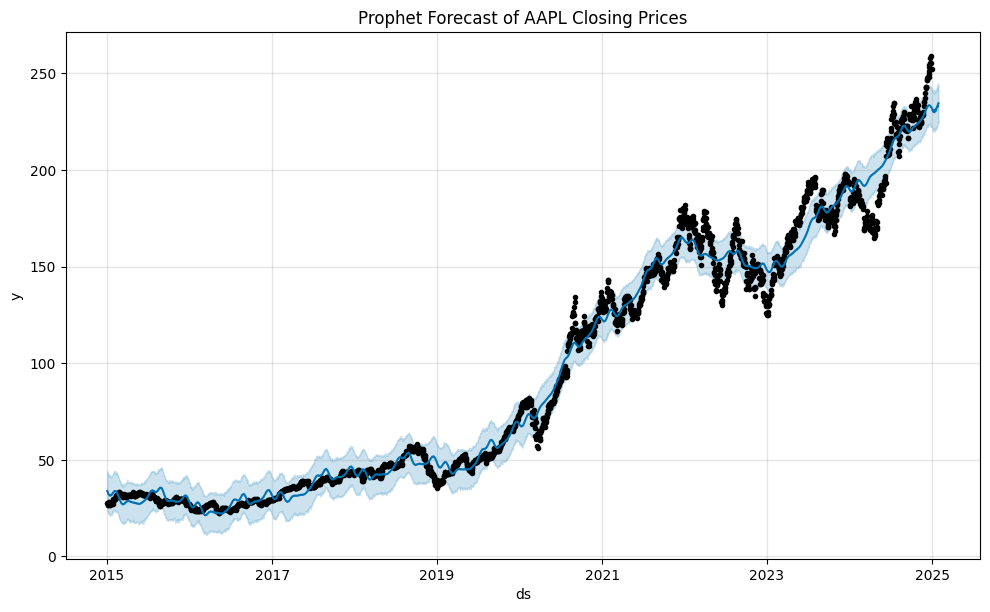

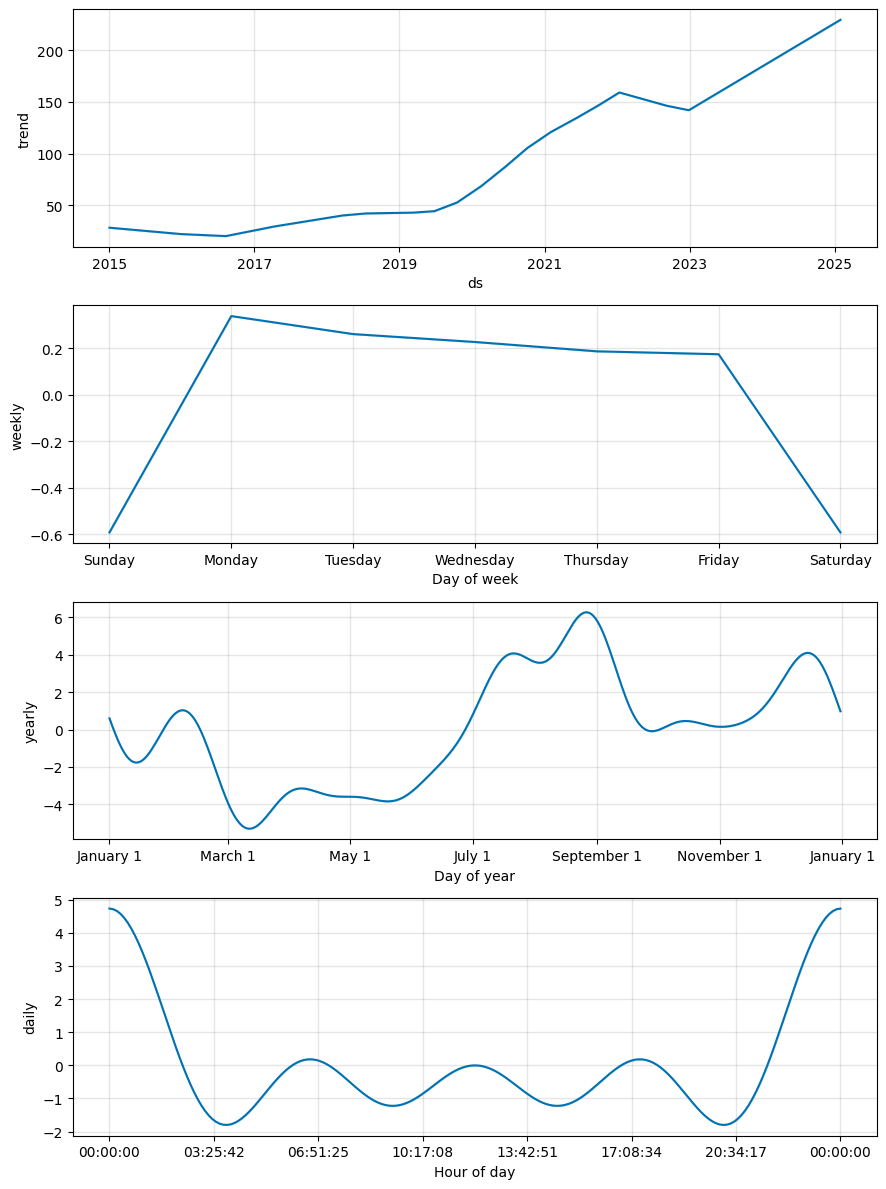

In [33]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# ✅ Step 1: Download data (adjustment OFF)
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31', auto_adjust=False)

# ✅ Step 2: Reset index and select required columns
data.reset_index(inplace=True)
# Select the 'Close' column by its name after reset_index
df = data[['Date', 'Close']].copy()
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# ✅ Step 3: Data cleaning - Ensure 'y' contains scalar values
# Explicitly extract the scalar value from each element in 'y'
df['y'] = df['y'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) else x)
df['ds'] = pd.to_datetime(df['ds'])

# Explicitly squeeze the 'y' data to ensure it's 1-dimensional
y_cleaned = df['y'].squeeze()

# Create a new DataFrame with just 'ds' and the cleaned 'y' Series
df_cleaned = pd.DataFrame({'ds': df['ds'], 'y': y_cleaned})


# ✅ Step 4: Ensure y column is numeric and properly aligned
df_cleaned['y'] = pd.to_numeric(df_cleaned['y'], errors='coerce')
df_cleaned.dropna(subset=['y'], inplace=True)  # remove any rows where 'y' is NaN

print(f"Data Types after renaming and cleaning:\n{df_cleaned.dtypes}\n")
print(f"Sample Data after renaming and cleaning:\n{df_cleaned.head()}")

# ✅ Step 5: Prophet Model
model = Prophet(daily_seasonality=True)
model.fit(df_cleaned)

# ✅ Step 6: Forecast next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# ✅ Step 7: Plot Forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast of AAPL Closing Prices")
plt.show()

# ✅ Step 8: Components Plot
fig2 = model.plot_components(forecast)
plt.show()

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0338
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.8185e-04
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 3.4720e-04
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.5762e-04
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3.6421e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


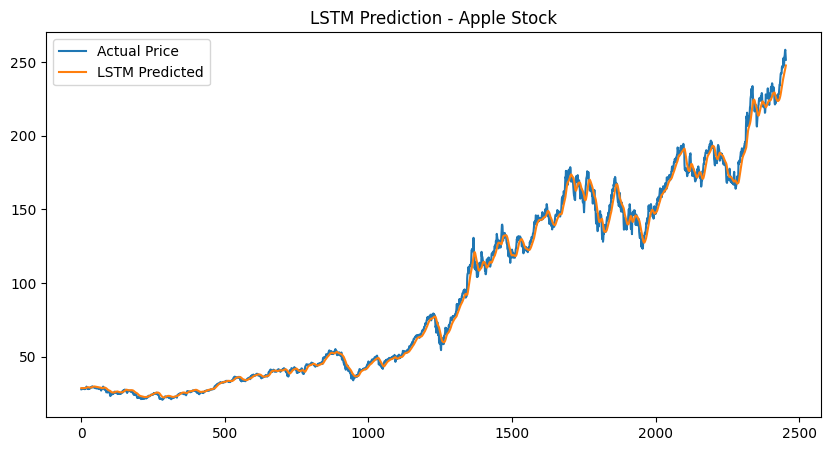

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preparing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['y']])

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X, y, epochs=5, batch_size=32)

# LSTM Prediction (on training data for simplicity)
predicted = model_lstm.predict(X)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))

# Plot LSTM Predictions
plt.figure(figsize=(10,5))
plt.plot(df['y'][60:].values, label='Actual Price')
plt.plot(predicted_prices, label='LSTM Predicted')
plt.legend()
plt.title('LSTM Prediction - Apple Stock')
plt.show()


✅ Actual Closing Prices (Last 30 Days): (30, 1)
✅ ARIMA RMSE: 13.626543889258002
✅ SARIMA RMSE: 14.139744096993018
✅ Prophet RMSE: 14.356757706277504
✅ LSTM RMSE: 9.68332772499287

✅ RMSE Comparison Table:

     Model       RMSE
0    ARIMA  13.626544
1   SARIMA  14.139744
2  Prophet  14.356758
3     LSTM   9.683328


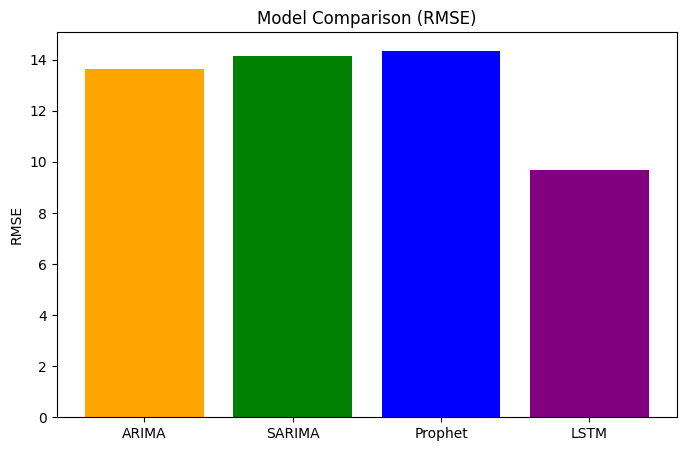

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['Close'] contains your full stock price history
test_actual = df['Close'][-30:].values
print("✅ Actual Closing Prices (Last 30 Days):", test_actual.shape)

# forecast_arima is your ARIMA forecast (length 30)
arima_rmse = np.sqrt(mean_squared_error(test_actual, forecast_arima[:30]))
print("✅ ARIMA RMSE:", arima_rmse)

# forecast_series is SARIMA forecast (length 30)
sarima_rmse = np.sqrt(mean_squared_error(test_actual, forecast_series[:30]))
print("✅ SARIMA RMSE:", sarima_rmse)

# forecast from Prophet includes entire data + future; we need the last 30 forecasted values
prophet_pred = forecast['yhat'][-30:].values
prophet_rmse = np.sqrt(mean_squared_error(test_actual, prophet_pred))
print("✅ Prophet RMSE:", prophet_rmse)

# predicted_prices is your LSTM predicted output (usually starting after the first 60 entries)
# Adjust indices accordingly
lstm_pred = predicted_prices[-30:].flatten()  # taking last 30 LSTM predicted values
lstm_rmse = np.sqrt(mean_squared_error(test_actual, lstm_pred))
print("✅ LSTM RMSE:", lstm_rmse)

results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, lstm_rmse]
})

print("\n✅ RMSE Comparison Table:\n")
print(results)

plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['RMSE'], color=['orange', 'green', 'blue', 'purple'])
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.show()

